# <center> <div align="center">PySensMCDA - Illustrative examples</div>
<br/>

**Note**: *this notebook was created for the purpose of providing an instruction of decision problem sensitivity analysis. For in-depth presentation of graphs submodule see* [`graphs_examples.ipynb`](./graphs_examples.ipynb)

<br/>

In [1]:
## Necessary imports for the notebook to work
from pysensmcda import alternative, criteria, compromise, graphs, probabilistic, ranking, calculate_preference
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Additional imports and function for output formatting
from sympy import Matrix
from IPython.display import display, Markdown
from examples_pretty_print import *

<br/>

### **Table of contents:**
1. [Alternative submodule:](#1)
    1. [Discrete modification](#2)
    1. [Percentage modification](#3)
    1. [Range modification](#4)
    1. [Alternative removal](#5)
    1. [General](#6)
1. [Criteria submodule:](#7)
    1. [Random distribution - weights generation](#8)
    1. [Percentage modification](#9)
    1. [Range modification](#10)
    1. [Weights scenarios](#11)
    1. [Cirteria identification](#12)
    1. [Criteria removal](#13)
1. [Probabilistic submodule:](#14)
    1. [Monte carlo weights generation](#15)
    1. [Perturbated matrix](#16)
    1. [Perturbated weights](#17)
1. [Ranking submodule:](#18)
    1. [Ranking alteration](#19)
    1. [Demotion](#20)
    1. [Promotion](#21)
    1. [Fuzzy ranking](#22)
1. [Compromise submodule:](#23)
    1. [General](#24)
    1. [Half-quadratic compromise additional informations](#25)
    1. [ICRA](#26)
1. [Further use](#27)

<a id="1"></a><br/>

## 1. Alternative submodule 

**Note**: Alternative submodule includes functions for modification of values along alternatives in decision matrix and alternative removal.

Let us consider following matrix, this matrix will be taken as an initial matrix for further function calls

In [12]:
matrix = np.array([
[4, 1, 6],
[2, 6, 3],
[9, 5, 7],
])
print('Initial matrix:')
display(Matrix(matrix))

Initial matrix:


Matrix([
[4, 1, 6],
[2, 6, 3],
[9, 5, 7]])

### 1.1. Discrete modification <a id="2"></a>

For each criterion we can define discrete values that will be set as a value. All possible combinations are generated.

In [24]:
discrete_values = np.array([[2, 3, 4], [1, 5, 6], [3, 4]], dtype='object')
pretty_print_alternative(alternative.discrete_modification(matrix, discrete_values)[0])

Alternative index: 1
Criteria index: 1
Change: 1
Resulting decision matrix:


Matrix([
[4.0, 1.0, 6.0],
[2.0, 1.0, 3.0],
[9.0, 5.0, 7.0]])

The value of alternative 1 in the first criterion was changed for discrete value '2'

### 1.2. Percentage modification <a id="3"></a>

Percentage values can be set as an `int` to make it the same for all criteria, or by an array to specify value for specific criterion.

In [28]:
percentages = 5
# percentages = np.array([3, 2, 3])
pretty_print_alternative(alternative.percentage_modification(matrix, percentages)[0])

Alternative index: 0
Criteria index: 0
Change: -0.01
Resulting decision matrix:


Matrix([
[3.96, 1.0, 6.0],
[ 2.0, 6.0, 3.0],
[ 9.0, 5.0, 7.0]])

In the case of percentage modification the value of first alternative under first criterion changed by -0.01, which means -1%

### 1.3. Range modification <a id="4"></a>

Range values should be specified for each criterion (2d-array) or for each value in decision matrix (3d-array).

In [31]:
range_values = np.array([[6, 8], [2, 4], [4, 6.5]])
range_modification_results = alternative.range_modification(matrix, range_values)
pretty_print_alternative(range_modification_results[0])

Alternative index: 0
Criteria index: 0
Change: 6.0
Resulting decision matrix:


Matrix([
[6.0, 1.0, 6.0],
[2.0, 6.0, 3.0],
[9.0, 5.0, 7.0]])

The range modification modifies values in specified range, if step is not passed, it is set to 1. The value of first alternative, first criterion was set to 6. In the next step it will be set to 7.

In [36]:
display(Markdown('##### **Next step**'))
pretty_print_alternative(range_modification_results[1])

##### **Next step**

Alternative index: 0
Criteria index: 0
Change: 7.0
Resulting decision matrix:


Matrix([
[7.0, 1.0, 6.0],
[2.0, 6.0, 3.0],
[9.0, 5.0, 7.0]])

### 1.4. Alternative removal <a id="5"></a>

In [60]:
pretty_print_alternative_removal(alternative.remove_alternatives(matrix)[0])

Alternative index: 0
Resulting decision matrix:


Matrix([
[2, 6, 3],
[9, 5, 7]])

In [37]:
display(Markdown('##### **Next step**'))
pretty_print_alternative_removal(alternative.remove_alternatives(matrix)[1])

##### **Next step**

Alternative index: 1
Resulting decision matrix:


Matrix([
[4, 1, 6],
[9, 5, 7]])

### 1.5. General <a id="6"></a>

All functions provide additional parameters.

- Parameter `indexes` - provides a way to restrict the use of function to specific criteria. **In the case of alternative removal, this parameter specifies indexes of alternatives that should be removed**
- Parameter `direction` *(only percentage function)* - specifies direction of the modification for each column in the matrix. 
- Parameter `step` *(only range and percentage functions)* - specifies step of next change

**For example**:

In [13]:
direction = np.array([-1, 1, -1])
percentages = np.array([2, 4, 9])
indexes = np.array([[0, 2], 1], dtype='object')
step = np.array([2, 2, 3])
results = alternative.percentage_modification(matrix, percentages, direction, indexes, step)
display(Markdown('##### **This will provide change for all alternative at first for the first and third criterion from step to percentage value:**'))
pretty_print_alternative(results[0])
display(Markdown('##### **And separately for all alternatives for second criterion:**'))
pretty_print_alternative(results[3])

##### **This will provide change for all alternative at first for the first and third criterion from step to percentage value:**

Alternative index: 0
Criteria index: (0, 2)
Change: (-0.02, -0.03)
Resulting decision matrix:


Matrix([
[3.92, 1.0, 5.82],
[ 2.0, 6.0,  3.0],
[ 9.0, 5.0,  7.0]])

##### **And separately for all alternatives for second criterion:**

Alternative index: 0
Criteria index: 1
Change: 0.02
Resulting decision matrix:


Matrix([
[4.0, 1.02, 6.0],
[2.0,  6.0, 3.0],
[9.0,  5.0, 7.0]])

---

<a id="7"></a><br>

## 2. Criteria submodule

**Note**: Criteria submodule includes functions for criteria removal and identification and weights generation.

### 2.1. Random distribution - weights generation <a id="8"></a>

This part of the submodule is solely dedicated to single weights vector generation.<br/>
For example let us generate vector of four weights ($n = 4$).

In [42]:
n = 4

- Chisquare distribution
    - `df` (Number of degrees of freedom)

In [73]:
weights = criteria.random_distribution.chisquare_distribution(n, df=1)
pretty_print_weights(np.round(weights, 6))

Resulting weights vector (example):


Matrix([[0.002701, 0.861813, 0.024502, 0.110984]])

- Laplace distribution:
    - `loc` (The position of distribution peak)
    - `scale` (The exponential decay)

In [98]:
weights = criteria.random_distribution.laplace_distribution(n, loc=0, scale=1)
pretty_print_weights(np.round(weights, 6))

Resulting weights vector (example):


Matrix([[0.095418, 0.008576, 0.67398, 0.222026]])

- Normal distribution:
    - `loc` (Mean of the normal distribution)
    - `scale` (Standard deviation of the normal distribution)

In [75]:
weights = criteria.random_distribution.normal_distribution(n, loc=0, scale=1)
pretty_print_weights(np.round(weights, 6))

Resulting weights vector (example):


Matrix([[0.250157, 0.309618, 0.30307, 0.137155]])

- Random distribution:
    - No additional parameters

In [76]:
weights = criteria.random_distribution.random_distribution(n)
pretty_print_weights(np.round(weights, 6))

Resulting weights vector (example):


Matrix([[0.150707, 0.246687, 0.37852, 0.224086]])

- Triangular distribution
    - `left` (The lower bound of the triangular distribution)
    - `mode` (The mode of the triangular distribution)
    - `right` (The upper bound of the triangular distribution)

In [78]:
weights = criteria.random_distribution.triangular_distribution(n, left=0, mode=0.5, right=1)
pretty_print_weights(np.round(weights, 6))

Resulting weights vector (example):


Matrix([[0.207306, 0.324307, 0.098486, 0.369901]])

- Uniform distribution:
    - `low` (Lower bound of the uniform distribution)
    - `high` (Upper bound of the uniform distribution)

In [79]:
weights = criteria.random_distribution.uniform_distribution(n, low=0, high=1)
pretty_print_weights(np.round(weights, 6))

Resulting weights vector (example):


Matrix([[0.061094, 0.226869, 0.152252, 0.559786]])

### 2.2. Percentage modification <a id="9"></a>

This function returns all possible modifications to the weights vector. Single weight is modified at one time, however rest of the weights are equally adjusted to provide a vector which sum is 1.

In [4]:
weights = np.array([0.3, 0.3, 0.4])
percentage = 5
results = criteria.percentage_modification(weights, percentage)
pretty_print_weights_generation(weights, results[0])

Initial weights vector:


Matrix([[0.3, 0.3, 0.4]])

Modified weight index: 0
Modification: -0.01
Resulting weights vector:


Matrix([[0.297, 0.3015, 0.4015]])

Similarly to alternatives modification functions. Percentage modification for weights provides additional parameters:
- `direction` - specifies the direction of the modification for each criterion weight
- `indexes` - specifies indexes of the criteria weights to be modified
- `step` - specifies step size for the percentage change.

We can further visualize the results.

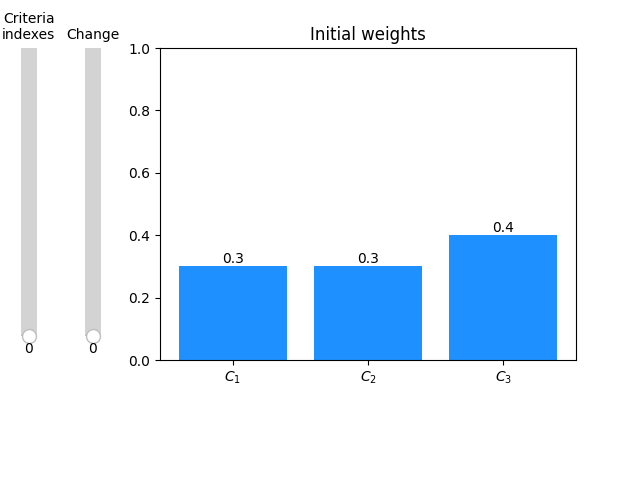

In [5]:
%matplotlib widget
# In the case of using sliders, the reference should be kept, so Python wouldn't GC
ax, criteria_slider, change_slider = graphs.slider_weights_barplot(weights, results, percentage_change=True, annotate_bars=True)
plt.show()

### 2.3. Range modification <a id="10"></a>

Similarly to percentage modification this function returns all possible modifications to the weights vector. Single weight is modified at one time, however rest of the weights are equally adjusted to provide a vector which sum is 1.

In [82]:
weights = np.array([0.3, 0.3, 0.4])
range_values = np.array([[0.25, 0.3], [0.3, 0.35], [0.37, 0.43]])
results = criteria.range_modification(weights, range_values)
pretty_print_weights_generation(weights, results[0])

Initial weights vector:


Matrix([[0.3, 0.3, 0.4]])

Modified weight index: 0
Modification: 0.25
Resulting weights vector:


Matrix([[0.25, 0.325, 0.425]])

**Note**: The range modification can be visualized similarly to percentage modification.

Additional parameters:
- `indexes` - specifies indexes of the criteria weights to be modified
- `step` - specifies step size for the percentage change.

### 2.4. Weights scenarios generation <a id="11"></a>

This function generates all possible combination of weights for specified number of criteria with specified step.

- Parallel - it is advised to use parallel version, especially for more than five criteria, default saves results to file

In [85]:
scenarios = criteria.generate_weights_scenarios(4, 0.1, 3, return_array=True, save_zeros=False)
pretty_print_weights(scenarios[0])

Resulting weights vector (example):


Matrix([[0.1, 0.1, 0.1, 0.7]])

- Sequential - provides additional progress bar, does not utilize temporary files

In [84]:
scenarios = criteria.generate_weights_scenarios(4, 0.1, 3, sequential=True, return_array=True, save_zeros=False)
pretty_print_weights(scenarios[0])

100%|██████████| 286/286.0 [00:00<?, ?it/s]

Resulting weights vector (example):


Matrix([[0.1, 0.7, 0.1, 0.1]])

### 2.5. Criteria removal <a id="12"></a>

This function removes specified criteria from decision matrix, adjusting weights so that the vector sums to 1. If no indexes are specified, all criteria are removed one by one.

In [5]:
matrix = np.array([
    [1, 2, 3, 4, 4],
    [1, 2, 3, 4, 4],
    [4, 3, 2, 1, 4]
])
weights = np.array([0.25, 0.25, 0.2, 0.2, 0.1])
print('Initial matrix:')
display(Matrix(matrix))
print('Initial weights:')
display(Matrix(weights).T)

Initial matrix:


Matrix([
[1, 2, 3, 4, 4],
[1, 2, 3, 4, 4],
[4, 3, 2, 1, 4]])

Initial weights:


Matrix([[0.25, 0.25, 0.2, 0.2, 0.1]])

In [6]:
results = criteria.remove_criteria(matrix, weights)
display(Markdown(f'##### **Example result (1/{len(results)}):**'))
pretty_print_crit_removal(results[0])

##### **Example result (1/5):**

Removed criterion index: 0
Resulting decision matrix:


Matrix([
[2, 3, 4, 4],
[2, 3, 4, 4],
[3, 2, 1, 4]])

Resulting weights vector:


Matrix([[0.333333333333333, 0.266666666666667, 0.266666666666667, 0.133333333333333]])

### 2.6. Criteria identification <a id="13"></a>

This method identifies criteria impact on the resulting ranking. It needs multi-criteria decision-making method to calculate preferences internally.

In [3]:
matrix = np.array([
    [4, 3, 5, 7],
    [7, 4, 2, 4],
    [9, 5, 7, 3],
    [3, 5, 6, 3]
    ])
criteria_num = matrix.shape[1]
criteria_types = np.array([1, 1, -1, 1])
weights = np.ones(criteria_num)/criteria_num
print('Initial matrix:')
display(Matrix(matrix))
print('Initial weights:')
display(Matrix(weights).T)
print('Initial criteria types:')
display(Matrix(criteria_types).T)


Initial matrix:


Matrix([
[4, 3, 5, 7],
[7, 4, 2, 4],
[9, 5, 7, 3],
[3, 5, 6, 3]])

Initial weights:


Matrix([[0.25, 0.25, 0.25, 0.25]])

Initial criteria types:


Matrix([[1, 1, -1, 1]])

- Using defined function - let us define weighted sum method function that returns preference values for alternatives

In [4]:
def weighted_sum_method(matrix, weights, types):
    # normalize decision matrix with sum normalization
    nmatrix = matrix.copy().astype(float)
    nmatrix[:, types == 1] = matrix[:, types == 1] / np.sum(matrix[:, types == 1], axis=0)
    nmatrix[:, types == -1] = (1 / matrix[:, types == -1]) / np.sum(1 / matrix[:, types == -1], axis=0)
    # each row of matrix is multiplied by weights
    weighted_matrix = nmatrix * weights
    # calculate preference scores
    return np.sum(weighted_matrix, axis=1)

In [6]:
call_kwargs = {
    'matrix': matrix,
    'weights': weights,
    'types': criteria_types
}
results = criteria.relevance_identification(weighted_sum_method, call_kwargs, ranking_descending=True)
pretty_print_crit_identification(results[0])

Removed criterion index(es): (0,)
Correlation value: 0.52
Distance value: 0.093636
Resulting decision matrix:


Matrix([
[3, 5, 7],
[4, 2, 4],
[5, 7, 3],
[5, 6, 3]])

The criterion with lowest impact was removed

- Using library - example `pymcdm`

In [8]:
import pymcdm.methods as pm

topsis = pm.TOPSIS()
call_kwargs = {
    'matrix': matrix,
    'weights': weights,
    'types': criteria_types
}
results = criteria.relevance_identification(topsis, call_kwargs, ranking_descending=True)
pretty_print_crit_identification(results[0])

Removed criterion index(es): (0,)
Correlation value: 0.52
Distance value: 0.211707
Resulting decision matrix:


Matrix([
[3, 5, 7],
[4, 2, 4],
[5, 7, 3],
[5, 6, 3]])

---

<a id="14"></a><br/>

## 3. Probabilistic submodule

This submodule offers a way to generate $x$ number of scenarios / samples for introducing noise to decision matrix or weights vector. Additionally it provides a way to generate $x$ number of samples of random weights vectors.

### 3.1. Monte carlo  <a id="15"></a>

Let us generate 1000 samples of random weights vectors for a problem with 3 criteria.

In [6]:
n = 3
modified_weights = probabilistic.monte_carlo_weights(n, num_samples=1000, distribution='normal', params={'loc': 0.5, 'scale': 0.1})
print(modified_weights)

[[0.34404508 0.28058289 0.37537203]
 [0.30753354 0.30424647 0.38821999]
 [0.21977179 0.32914608 0.45108213]
 ...
 [0.32556476 0.27589953 0.39853571]
 [0.38695309 0.38349469 0.22955222]
 [0.28951349 0.38785578 0.32263073]]


The weights vectors can be further visualized on distribution plot

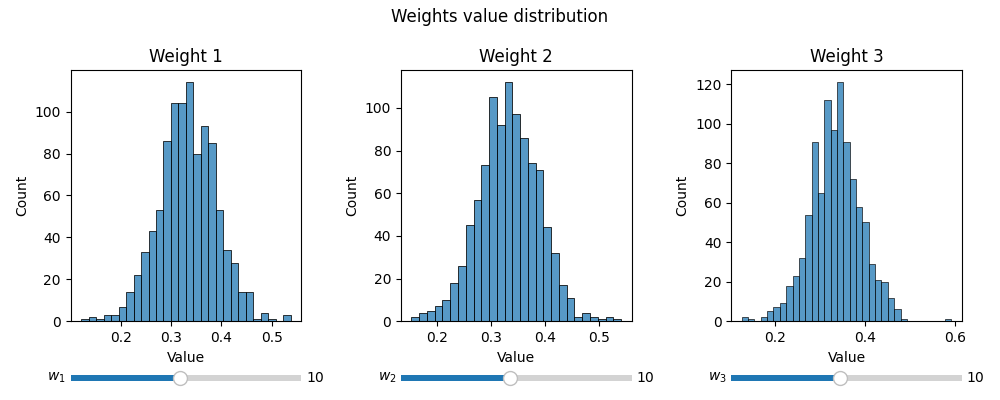

In [7]:
%matplotlib widget
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

for idx in range(modified_weights.shape[1]):
    # In the case of using sliders, the reference should be kept, so Python wouldn't GC
    _, bins_slider = graphs.hist_dist(modified_weights[: , idx], ax[idx], fig=fig, slider_label=f'$w_{{{idx+1}}}$', kind='hist', xlabel='Value', title=f'Weight {idx+1}')
plt.suptitle('Weights value distribution')
plt.tight_layout(w_pad=1.5)
plt.show()

### 3.2. Perturbated matrix  <a id="16"></a>

In [14]:
matrix = np.array([[4, 3, 7], 
                   [1, 9, 6], 
                   [7, 5, 3]])
simulations = 1000
results = probabilistic.perturbed_matrix(matrix, simulations)
print('Initial matrix:')
display(Matrix(matrix))
print(f'Example resulting matrix (1/{len(results)}):')
display(Matrix(results[0]))

Initial matrix:


Matrix([
[4, 3, 7],
[1, 9, 6],
[7, 5, 3]])

Example resulting matrix (1/1000):


Matrix([
[3.929184, 3.093076, 6.910322],
[1.069319, 8.960681, 5.907122],
[7.079165, 4.983669, 2.912692]])

### 3.3. Perturbated weights  <a id="17"></a>

In [15]:
weights = np.array([0.3, 0.4, 0.3])
simulations = 1000
results = probabilistic.perturbed_weights(weights, simulations)

print('Initial weights vector:')
display(Matrix(weights).T)
print(f'Example resulting weights vector (1/{len(results)}):')
display(Matrix(results[0]).T)

Initial weights vector:


Matrix([[0.3, 0.4, 0.3]])

Example resulting weights vector (1/1000):


Matrix([[0.250846, 0.431281, 0.317873]])

---

<a id="18"></a><br/>

## 4. Ranking submodule

### 4.1. Ranking alternation  <a id="19"></a>

This function finds smallest possible changes in weights values which will result in different ranking.

In [18]:
import pymcdm.methods as pm

weights = np.array([0.4, 0.5, 0.1])
matrix = np.array([
    [4, 2, 6],
    [7, 3, 2],
    [9, 6, 8]
])
types = np.array([-1, 1, -1])

aras = pm.ARAS()
pref = aras(matrix, weights, types)
initial_ranking = aras.rank(pref)
call_kwargs = {
    "matrix": matrix,
    "weights": weights,
    "types": types
}
ranking_descending = True
results = ranking.ranking_alteration(weights, initial_ranking, aras, call_kwargs, ranking_descending)

print('Initial ranking:')
display(Matrix(initial_ranking).T)
print(f'Example result (1/{len(results)}):\n')
print(f'Modified weight index: {results[0][0]}')
print('Resulting weights:')
display(Matrix(results[0][1]).T)
print('Resulting new ranking:')
display(Matrix(results[0][2]).T)

Initial ranking:


Matrix([[2.0, 3.0, 1.0]])

Example result (1/3):

Modified weight index: 0
Resulting weights:


Matrix([[0.39, 0.505, 0.105]])

Resulting new ranking:


Matrix([[3.0, 2.0, 1.0]])

### 4.2. Demotion  <a id="20"></a>

In [3]:
import pymcdm.methods as pm

matrix = np.array([
    [4, 2, 6],
    [7, 3, 2],
    [9, 6, 8]
])
weights = np.array([0.4, 0.5, 0.1])
types = np.array([-1, 1, -1])

copras = pm.COPRAS()
pref = copras(matrix, weights, types)
initial_ranking = copras.rank(pref)
call_kwargs = {
    "matrix": matrix,
    "weights": weights,
    "types": types
}
ranking_descending = True

direction = np.array([1, -1, 1])
step = 0.5
max_modification = 100
results = ranking.ranking_demotion(matrix, initial_ranking, copras, call_kwargs, ranking_descending, direction, step, max_modification=max_modification)

print('Initial ranking:')
display(Matrix(initial_ranking).T)
print(f'Example result (1/{len(results)}):\n')
print(f'Alternative index: {results[0][0]}')
print(f'Criterion index: {results[0][1]}')
print(f'Size of change: {results[0][2]}')
print(f'New position: {results[0][3]}')


Initial ranking:


Matrix([[2.0, 3.0, 1.0]])

Example result (1/9):

Alternative index: 0
Criterion index: 0
Size of change: 5.0
New position: 3


The results from demotion analysis can be further visualized

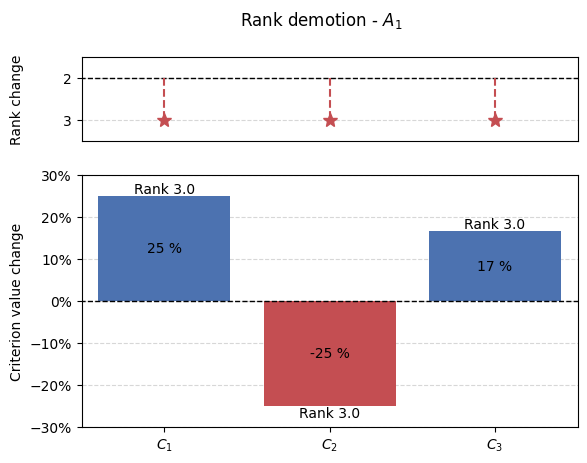

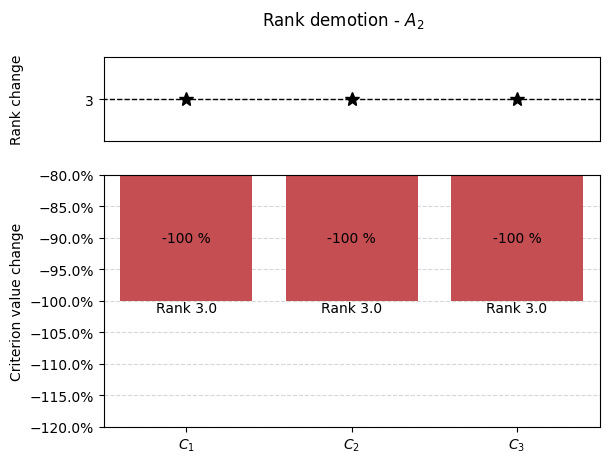

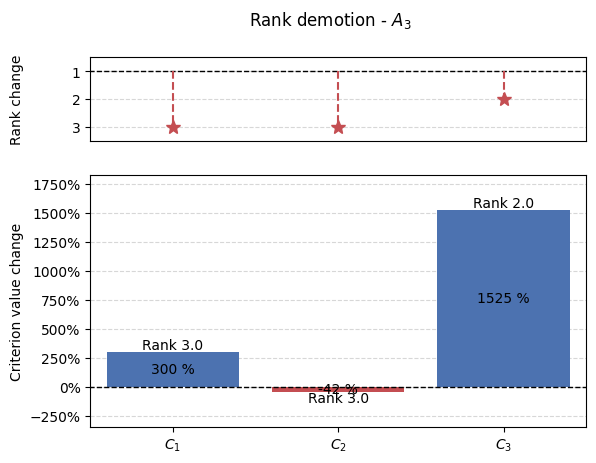

In [4]:
%matplotlib inline
results = np.array(results)
for alt in range(matrix.shape[1]):
    alt_results = results[results[:, 0] == alt]
    percentage_changes = []
    new_positions = []
    if len(alt_results):
        for crit in range(matrix.shape[0]):
            r = alt_results[alt_results[:, 1] == crit]
            if len(r):
                _ , crit, change, new_pos = r[0]
                crit = int(crit)
                percentage_changes.append((change - matrix[alt, crit])/matrix[alt, crit]*100)
                new_positions.append(new_pos)
            else:
                percentage_changes.append(0)
                new_positions.append(initial_ranking[alt])
        step = int(np.max(np.abs([np.min(np.array(percentage_changes))/5, np.max(np.array(percentage_changes))/5])))
        graphs.pd_rankings_graph(initial_ranking[alt], new_positions, np.array(percentage_changes), kind='bar', title=f'Rank demotion - $A_{{{alt+1}}}$')
        plt.show()

### 4.3. Promotion  <a id="21"></a>

In [5]:
import pymcdm.methods as pm

matrix = np.array([
    [4, 2, 6],
    [7, 3, 2],
    [9, 6, 8]
])
weights = np.array([0.4, 0.5, 0.1])
types = np.array([-1, 1, -1])
copras = pm.COPRAS()
pref = copras(matrix, weights, types)
initial_ranking = copras.rank(pref)
call_kwargs = {
    "matrix": matrix,
    "weights": weights,
    "types": types
}
ranking_descending = True
direction = np.array([-1, 1, -1])
step = 0.5
max_modification = 1000
results = ranking.ranking_promotion(matrix, initial_ranking, copras, call_kwargs, ranking_descending, direction, step, max_modification=max_modification)

print('Initial ranking:')
display(Matrix(initial_ranking).T)
print(f'Example result (1/{len(results)}):\n')
print(f'Alternative index: {results[0][0]}')
print(f'Criterion index: {results[0][1]}')
print(f'Size of change: {results[0][2]}')
print(f'New position: {results[0][3]}')

Initial ranking:


Matrix([[2.0, 3.0, 1.0]])

Example result (1/9):

Alternative index: 0
Criterion index: 0
Size of change: 2.5
New position: 1


Results from the promotion function can be visualized similarly to demotion.

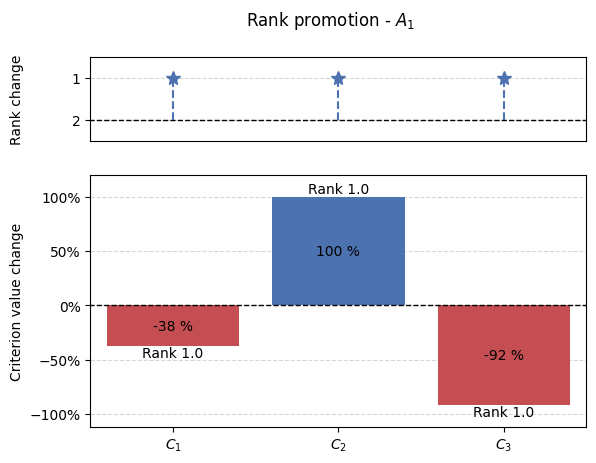

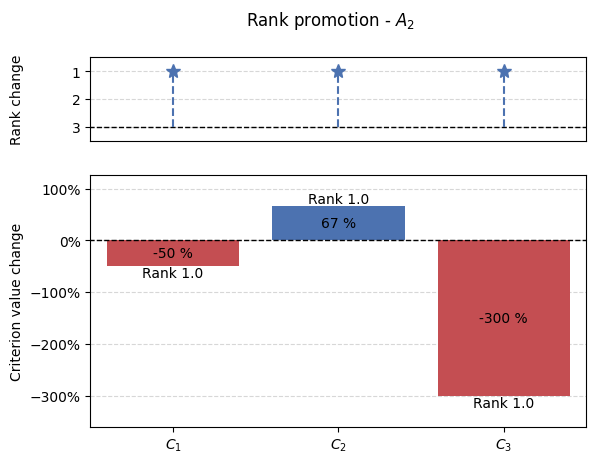

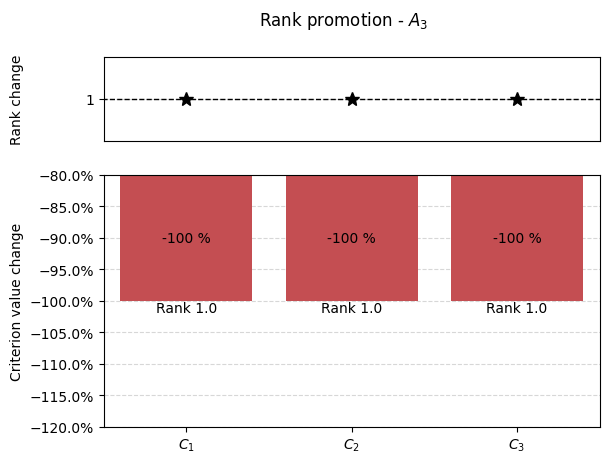

In [6]:
results = np.array(results)
for alt in range(matrix.shape[1]):
    alt_results = results[results[:, 0] == alt]
    percentage_changes = []
    new_positions = []
    if len(alt_results):
        for crit in range(matrix.shape[0]):
            r = alt_results[alt_results[:, 1] == crit]
            if len(r):
                _ , crit, change, new_pos = r[0]
                crit = int(crit)
                percentage_changes.append((change - matrix[alt, crit])/matrix[alt, crit]*100)
                new_positions.append(new_pos)
            else:
                percentage_changes.append(0)
                new_positions.append(initial_ranking[alt])
        graphs.pd_rankings_graph(initial_ranking[alt], new_positions, np.array(percentage_changes), kind='bar', title=f'Rank promotion - $A_{{{alt+1}}}$')

### 4.4. Fuzzy ranking  <a id="22"></a>

This function calculates fuzzy ranking from multiple acquired rankings. For example `generate_weights_scenarios` could be used to calculate multiple rankings and then fuzzy ranking could be calculated.

In [30]:
rankings = np.array([
    [1, 2, 3, 4, 5],
    [2, 1, 5, 3, 4],
    [4, 3, 2, 5, 1],
    [3, 2, 1, 4, 5],
])
fuzzy_rank = ranking.fuzzy_ranking(rankings, normalization_axis=0)
print('Resulting fuzzy rank:')
display(Matrix(fuzzy_rank))

Resulting fuzzy rank:


Matrix([
[1.0, 0.5, 1.0,   0, 0.5],
[1.0, 1.0, 1.0,   0,   0],
[1.0, 0.5, 1.0, 0.5,   0],
[1.0,   0,   0, 1.0, 0.5],
[  0,   0, 1.0, 0.5, 1.0]])

This can be futher visualized using heatmap.

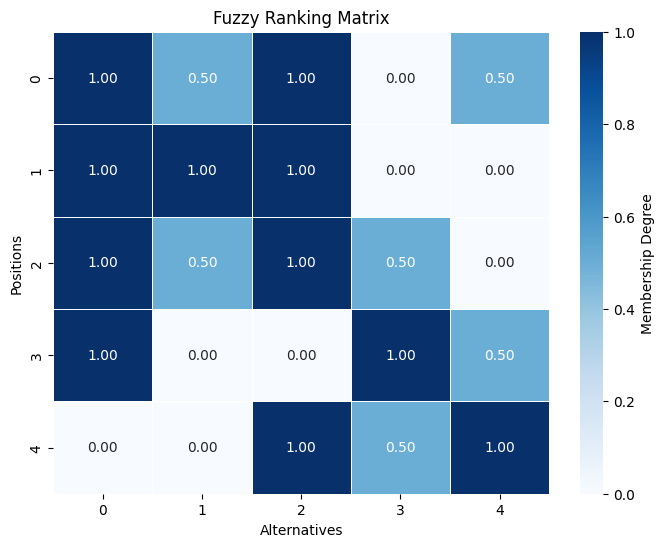

In [35]:
%matplotlib inline
graphs.heatmap(fuzzy_rank, title="Fuzzy Ranking Matrix", figsize=(8, 6))

plt.show()

---

<a id="23"></a><br/>

## 5. Compromise submodule

This submodule consist of functions that calculate compromise between different rankings.

### 5.1. General <a id="24"></a>

Most methods work in similar fashion, by either providing rankings or preferences we can calculate the compromised ranking.

Let us consider following ranking and preferences acquired using TOPSIS and VIKOR.

In [4]:
preferences = np.array([[0.601, 0.5254],
                        [0.5355, 0.635],
                        [0.497, 0.7257],
                        [0.5648, 0.1143],
                        [0.5713, 0.5775],
                        [0.3163, 1.0],
                        [0.5559, 0.6188],
                        [0.6186, 0.2039]])
rankings = np.array([[2., 3.],
                    [6., 6.],
                    [7., 7.],
                    [4., 1.],
                    [3., 4.],
                    [8., 8.],
                    [5., 5.],
                    [1., 2.]])

print('Initial preferences:')
display(Matrix(preferences))
print('Initial rankings:')
display(Matrix(rankings))

Initial preferences:


Matrix([
[ 0.601, 0.5254],
[0.5355,  0.635],
[ 0.497, 0.7257],
[0.5648, 0.1143],
[0.5713, 0.5775],
[0.3163,    1.0],
[0.5559, 0.6188],
[0.6186, 0.2039]])

Initial rankings:


Matrix([
[2.0, 3.0],
[6.0, 6.0],
[7.0, 7.0],
[4.0, 1.0],
[3.0, 4.0],
[8.0, 8.0],
[5.0, 5.0],
[1.0, 2.0]])

- Borda

In [54]:
print('Resulting compromise ranking:')
display(Matrix(compromise.borda(rankings)).T)

Resulting compromise ranking:


Matrix([[2.5, 6.0, 7.0, 2.5, 4.0, 8.0, 5.0, 1.0]])

- Dominance directed graph

In [55]:
print('Resulting compromise ranking:')
display(Matrix(compromise.dominance_directed_graph(rankings)).T)

Resulting compromise ranking:


Matrix([[3.0, 6.0, 7.0, 2.0, 4.0, 8.0, 5.0, 1.0]])

- Rank position method

In [56]:
print('Resulting compromise ranking:')
display(Matrix(compromise.rank_position(rankings)).T)

Resulting compromise ranking:


Matrix([[3.0, 6.0, 7.0, 2.0, 4.0, 8.0, 5.0, 1.0]])

- Half-quadratic compromise

In [58]:
print('Resulting compromise ranking:')
display(Matrix(compromise.HQ_compromise(rankings)[2]).T)

Resulting compromise ranking:


Matrix([[2.5, 6.0, 7.0, 2.5, 3.5, 8.0, 5.0, 1.5]])

- Improved borda

In [59]:
print('Resulting compromise ranking:')
display(Matrix(compromise.improved_borda(preferences, [1, -1])).T)

Resulting compromise ranking:


Matrix([[2.0, 6.0, 7.0, 3.0, 4.0, 8.0, 5.0, 1.0]])

### 5.2. HQ compromise additional informations <a id="25"></a>

HQ compromise method apart from resulting in the compromised ranking it provides `consensus index` and `trust index` and `weights` of each ranking which can be of help to decision-maker.

### 5.3. ICRA <a id="26"></a>

ICRA is presented separately as it provides more in-depth compromise seeking.

In this example the same initial preferences will be used

In [5]:
import pymcdm.methods as pm

topsis = pm.TOPSIS()
vikor = pm.VIKOR()

methods = {
    topsis: ['matrix', 'weights', 'types'],
    vikor: ['matrix', 'weights', 'types']
    }

ICRA_matrix = np.array([preferences[:, 0], preferences[:, 1]]).T
method_types = np.array([1, -1])

result = compromise.ICRA.iterative_compromise(methods, ICRA_matrix, method_types)
print('Resulting compromise ranking:')
display(Matrix(result.final_rankings[:, 0]).T)

Resulting compromise ranking:


Matrix([[3.0, 6.0, 7.0, 2.0, 4.0, 8.0, 5.0, 1.0]])

In the case of ICRA, we can visualize the preference distribution change.

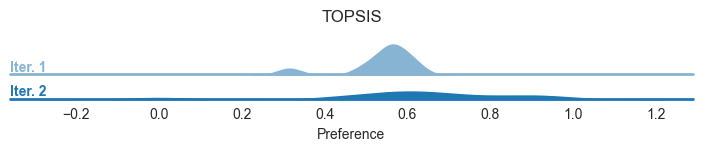

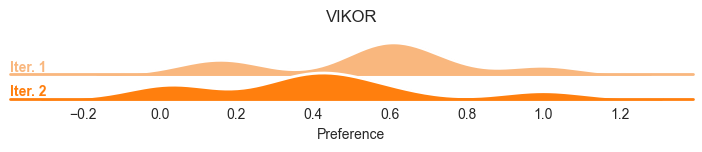

In [6]:
graphs.ICRA_pref_distribution(result, ['TOPSIS', 'VIKOR'], by='methods')

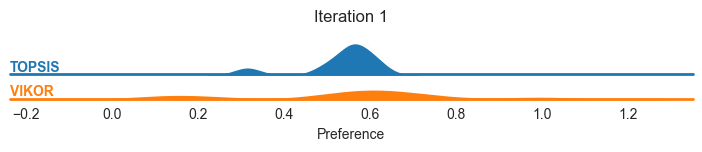

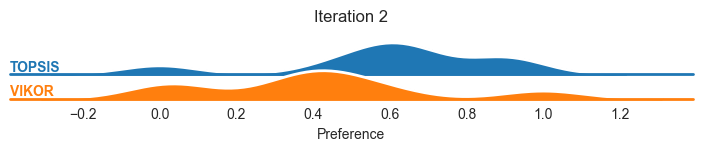

In [7]:
graphs.ICRA_pref_distribution(result, ['TOPSIS', 'VIKOR'], by='iters')

---

<a id="27"></a><br/>

## 6. Further use

For most of the functions that modifies the decision matrix or weights vector, the library includes a wrapper for calculating the preference values and rankings for the returned results.

**Example**

In [9]:
import pymcdm.methods as pm

weights = np.array([0.3, 0.3, 0.4])
percentage = 5
results = criteria.percentage_modification(weights, percentage)

topsis = pm.TOPSIS()
kwargs = {
    'matrix': np.random.random((10, 3)),
    'weights': weights,
    'types': np.ones(3)
}

preferences_results = calculate_preference(criteria.percentage_modification, results, topsis, kwargs, only_preference=False, method_type=1)
preferences_results

[(0,
  -0.01,
  array([0.297 , 0.3015, 0.4015]),
  array([0.35523716, 0.37880508, 0.58809771, 0.5640484 , 0.37077233,
         0.57433661, 0.54914172, 0.62030165, 0.31944243, 0.28483622]),
  array([ 8.,  6.,  2.,  4.,  7.,  3.,  5.,  1.,  9., 10.])),
 (0,
  0.01,
  array([0.303 , 0.2985, 0.3985]),
  array([0.35863316, 0.38360753, 0.58200947, 0.56521669, 0.37742215,
         0.56969001, 0.54413253, 0.62298952, 0.32084585, 0.28230735]),
  array([ 8.,  6.,  2.,  4.,  7.,  3.,  5.,  1.,  9., 10.])),
 (0,
  -0.02,
  array([0.294, 0.303, 0.403]),
  array([0.35354967, 0.376411  , 0.59114508, 0.56346911, 0.36743618,
         0.57664508, 0.55163568, 0.61897793, 0.31874794, 0.28608496]),
  array([ 8.,  6.,  2.,  4.,  7.,  3.,  5.,  1.,  9., 10.])),
 (0,
  0.02,
  array([0.306, 0.297, 0.397]),
  array([0.36034104, 0.38601523, 0.578969  , 0.56580547, 0.38073585,
         0.56735258, 0.54161802, 0.62435328, 0.32155445, 0.28102748]),
  array([ 8.,  6.,  2.,  4.,  7.,  3.,  5.,  1.,  9., 10.])),
 (0,

#### In the case of analyzing different criteria weights, we are left with multiple rankings, which for easier analysis can be further visualized.

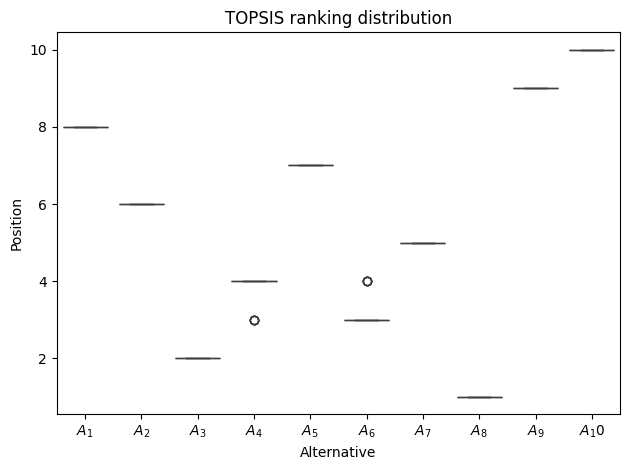

In [15]:
graphs.rankings_distribution(np.array([*np.array(preferences_results, dtype='object')[:, 4]]), title='TOPSIS ranking distribution')
plt.show()